# 04 Example - Average Scans

In [1]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import random

## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Define a measure function

In [3]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices and adds a random component. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage + random.gauss(mu=0, sigma=1)
    d.v2_readout = devices.v2.voltage + random.gauss(mu=0, sigma=1)

    d.vsum = d.v1_readout + d.v2_readout
    
    return d

## Experiments

### 1. 0D scan with scan0 as AverageScan, using point data

This experiment will output data containing a single point, which represents the average of 10 measurements.
Remember, AverageScan does not add a dimension to the resulting data as only the averaged value is ultimately saved.

In [4]:
# Set v1 voltage to 0V
devices.v1.voltage = 0

# Setup runinfo with scan0 as AverageScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.run()

sleep(1)
expt.v1_readout

Scan 1/1 Complete


-0.13947490690770636

### 2. 1D Scan with scan1 as AverageScan, using point data

In [5]:
# Setup runinfo with scan0 as PropertyScan and scan1 as AverageScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


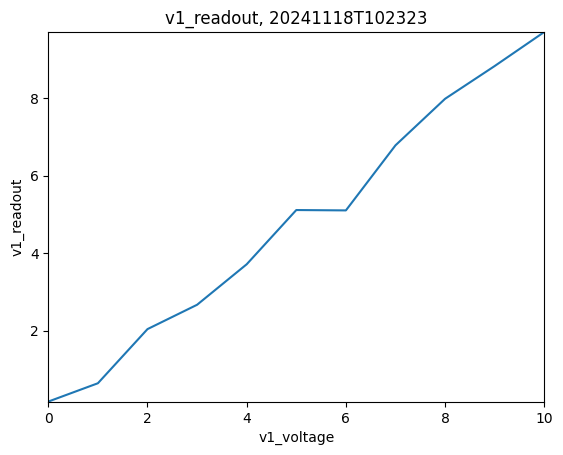

In [6]:
ps.live_plot1D(expt)

### 3. 2D Scan with scan2 as AverageScan, using point data

This scan collects an entire grid of data with 'v1_voltage' on the x axis and 'v2_voltage' on the y axis. This is repeated 10 times, with the new data incoprorated into the average each time.

In [7]:
# Setup runinfo with scan0 and scan1 as PropertyScan and scan2 as AverageScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 2, 10)}, prop='voltage', dt=0.01)
runinfo.scan2 = ps.AverageScan(10, dt=0.1)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


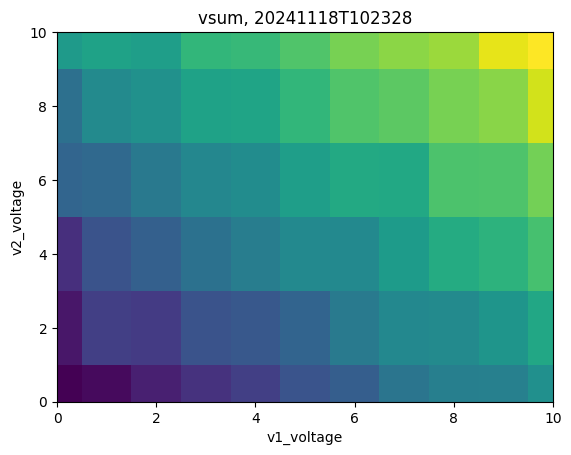

In [8]:
ps.live_plot2D(expt, data_name="vsum")

### 4. 2D Scan with scan1 as AverageScan, using point data

This scan collects a single row of data iterating over the 'v1_voltage'. This is repeated 10 times, with the new data incoprorated into the average each time. Then, 'v2_volgage' is iterated (y-axis) and the cycle repeats until all scans have been scaned through until completion. 

In [9]:
# Setup runinfo with scan0 as PropertyScan, scan1 as AverageScan, and scan2 as PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.AverageScan(10, dt=0.1) 
runinfo.scan2 = ps.PropertyScan({'v2': ps.drange(0, 2, 10)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


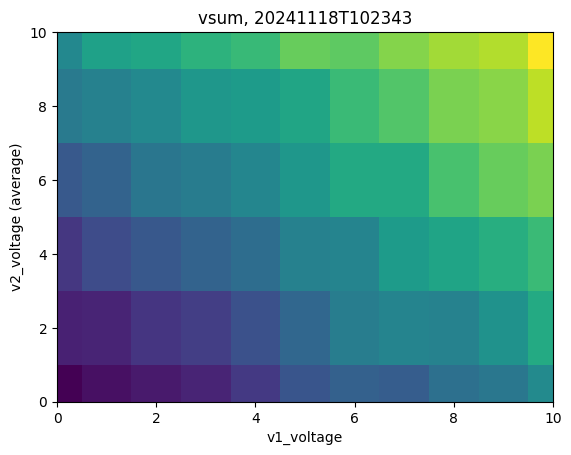

In [10]:
# note the kwargs x_name and y_name must be specified in this case since we are not using the default scans, which are the first two scan instances 
ps.live_plot2D(expt, x_name='v1_voltage', y_name='v2_voltage', data_name="vsum")